In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch [0], Loss:  236.0149
Epoch [50 / 500], Loss:  5.0743
Epoch [100 / 500], Loss:  4.9263
Epoch [150 / 500], Loss:  4.8363
Epoch [200 / 500], Loss:  4.7816
Epoch [250 / 500], Loss:  4.7484
Epoch [300 / 500], Loss:  4.7282
Epoch [350 / 500], Loss:  4.7159
Epoch [400 / 500], Loss:  4.7084
Epoch [450 / 500], Loss:  4.7038
Epoch [500 / 500], Loss:  4.7011


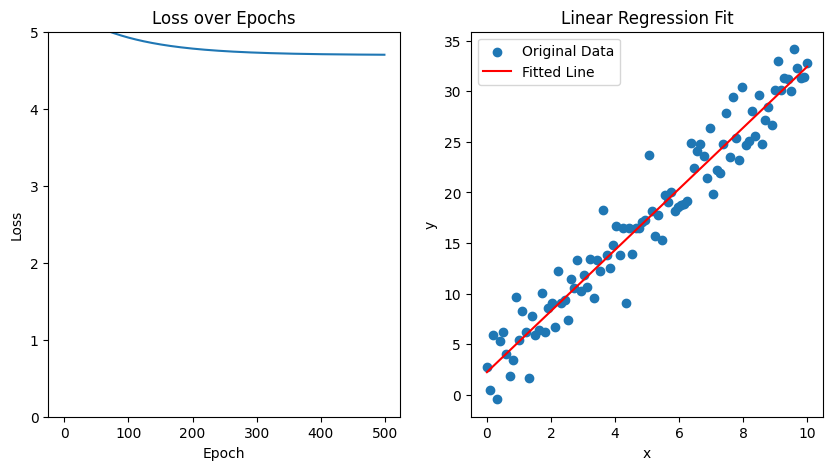

Model parameters
linear.weight: tensor([[3.0209]])
linear.bias: tensor([2.2258])


In [7]:
# 선형회귀 연습
# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2

# 2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)
  
    def forward(self, x):
        return self.linear(x)
  
model = LinearRegressionModel()

# 3. 손실함수 정의
# 손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
# lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 5. 학습 반복
epochs = 500
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 예측값 계산
    loss = loss_function(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item()) # 손실값 저장

    if epoch == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}], Loss: {loss.item(): .4f}")

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="red", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")